#Task 2 for MIDAS Summer Internship

# First Step

## Importing the Necessary Libraries

In [ ]:
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
import cv2
import os.path
from os import path
import numpy as np
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.preprocessing import image
from PIL import Image
import matplotlib.pyplot as plt
from keras.layers import Conv2D,Flatten, Dense, Dropout, BatchNormalization, LeakyReLU, MaxPool2D , Cropping2D
from keras.optimizers import Adam
from keras.models import Sequential
from keras import regularizers
from keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.layers import Lambda
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

## Making Labels
Since images were mapped to labels like 0 -> 0 , A -> 10 and so on . So we have made a function that returns the labels for it . Therefore, labels[0] = 0 , labels[11] = A and so on.  

In [ ]:
def MakeLabels():
  ## Making Labels if the output is from 0 to 9.
  labels = dict()
  for i in range(1,10):
    labels[i-1] = i-1
  labels[9] = 9
  ## Making Labels if the output is from A to Z.
  alpha_upperCase = "A"
  val_upperCase = ord(alpha_upperCase)
  for i in range(11,37):
    labels[i-1] = chr(val_upperCase)
    val_upperCase = val_upperCase + 1
  ## Making Labels if the output is from a to z.
  alpha_lowerCase = "a"
  val_lowerCase = ord(alpha_lowerCase)
  for i in range(37,63):
    labels[i-1] = chr(val_lowerCase)
    val_lowerCase = val_lowerCase + 1
  ##Returning the Dictionary
  return labels
  



In [ ]:
def VisualizeTheOriginalDataset():
  img = cv2.imread('/content/drive/MyDrive/MIDASTask/train/Sample001/img001-001.png')
  # report details about the image
  #img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  plt.imshow(img)


## Pre-Processing Done on the Dataset .
The images had a lot of white spaces and only a small percent of the images contained the numbers and alphabets . So we removed the background such that the majority of the image space was covered by numbers and alphabets .
The <i>VisualiseTheDatasetAfterPreProcessing()</i> function shows how the image will look like after doing the above mentioned steps. 
<br>
Sources:
[How to remove whitespace from an image in OpenCV?](https://stackoverflow.com/questions/49907382/how-to-remove-whitespace-from-an-image-in-opencv)

In [ ]:
def VisualiseTheDatasetAfterPreProcessing():
  img=cv2.imread('/content/drive/MyDrive/MIDASTask/train/Sample001/img001-001.png')
  gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  gray=255*(gray<128)
  coords=cv2.findNonZero(gray)
  x,y,w,h=cv2.boundingRect(coords)
  img=img[y:y+h,x:x+w]
  data = Image.fromarray(img)
  data = data.resize((40,40))
  plt.imshow(data)

## UploadingTheDataset
In the function <i>UploadTheDataset()</i> , the dataset is loaded . The x list inside the function stores the image names whereas the y stores the labels . Atlast, y is converted into a numpy array and converted into the Categorical Value .

In [ ]:
def UploadTheDataset():
  x = []
  y = []
  for i in range(1,63):
    path_prev = str('{:03}'.format(i));
    for j in range(1,60):
      path_rec = 'Sample'+path_prev+'/'+'img'+path_prev+'-'+str('{:03}'.format(j)) +'.png'
      if path.exists("/content/drive/MyDrive/MIDASTask/train/"+path_rec):
        x.append(path_rec)
        y.append(i-1);
      else:
        continue
  y = np.array(y)
  y = to_categorical(y,num_classes=62, dtype = 'int')
  return x,y



## Split The Dataset
The function <i>SplitTheDataset()</i> splits the dataset into x_train, x_valid, y_train and y_valid . 

In [ ]:
def SplitTheDataset():
  x,y = UploadTheDataset()
  x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=0)
  return x_train, x_valid, y_train, y_valid

## Upload The Image Array 
The function <i>UploadTheImageArrays()</i> does the following things:
<ul>
<li>Removes the part of the image which doesn't contain the alphabets/numbers . It was done as majority of the image contain blank spaces and wouldn't help in training the model .</li>
<li>Then at last, the images were converted into Gray-Scale with size (40,40) .</li>
</ul>  
<br>


In [ ]:
def UploadTheImageArrays(x_img):
  x_f = []
  for i in range(0,len(x_img)):
    img=cv2.imread('/content/drive/MyDrive/MIDASTask/train/'+x_img[i])
    img1 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    gray = 255*(gray<128)
    coords = cv2.findNonZero(gray)
    x,y,w,h = cv2.boundingRect(coords)
    img1=img1[y:y+h,x:x+w]
    data = Image.fromarray(img1)
    data = data.resize((40,40))
    data = image.img_to_array(data)
    x_f.append(data/255.0)
  x_final = np.array(x_f)
  return x_final

## Visualising the Original Data 

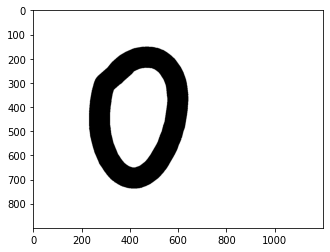

In [ ]:
VisualizeTheOriginalDataset()

## Visualising the pre-processed Data.
<b>The image is not converted into Grayscale but is is converted before putting into the model . </b>

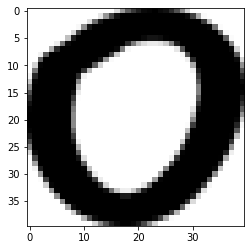

In [ ]:
VisualiseTheDatasetAfterPreProcessing()

## In the subsequent cells , the functions which were explained above have been executed .

In [ ]:
labels = MakeLabels()
for k,v in labels.items():
  print(k,v)

0 0
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9
10 A
11 B
12 C
13 D
14 E
15 F
16 G
17 H
18 I
19 J
20 K
21 L
22 M
23 N
24 O
25 P
26 Q
27 R
28 S
29 T
30 U
31 V
32 W
33 X
34 Y
35 Z
36 a
37 b
38 c
39 d
40 e
41 f
42 g
43 h
44 i
45 j
46 k
47 l
48 m
49 n
50 o
51 p
52 q
53 r
54 s
55 t
56 u
57 v
58 w
59 x
60 y
61 z


In [ ]:
x_train,x_valid,y_train,y_valid = SplitTheDataset()
print(len(x_train), len(x_valid),y_train.shape,y_valid.shape)

1984 496 (1984, 62) (496, 62)


In [ ]:
x_train_final = UploadTheImageArrays(x_train)
print(x_train_final.shape)

(1984, 40, 40, 1)


In [ ]:
x_valid_final = UploadTheImageArrays(x_valid)
print(x_valid_final.shape)

(496, 40, 40, 1)


## Model Architecture


The model consists of 3 Conv Layers and then two fully connected layers . The Architecture is :
<ul>
<li>Conv2d - 16 filters, 3x3 Filter Size , activation = relu</li>
<li>BatchNormalization()</li>
<li>MaxPooling of 2 x 2</li>
<br>
<li>Conv2d - 16 filters, 3x3 Filter Size , activation = relu</li>
<li>BatchNormalization()</li>
<li>MaxPooling of 2 x 2</li>
<br>
<li>Conv2d - 32 filters, 5x5 Filter Size , activation = relu</li>
<li>BatchNormalization()</li>
<br>
<li>Then the model is flattened.</li>
<br>
<li>Dense Layer - 128 Neurons, activation = relu </li>
<br>
<li>Dense Layer - 62 Neurons, activation = softmax </li>
</ul>

This model was working well as it had optimal amout of parameters and was properly fitting on the dataset .
<br>
Sources :
[Analyzing different types of activation functions in neural networks — which one to prefer?](https://towardsdatascience.com/analyzing-different-types-of-activation-functions-in-neural-networks-which-one-to-prefer-e11649256209#:~:text=Softmax%20activation%20function&text=For%20a%20binary%20classification%20problem,a%20type%20of%20sigmoid%20function.)
<br>
[Glossary of Deep Learning: Batch Normalisation](https://medium.com/deeper-learning/glossary-of-deep-learning-batch-normalisation-8266dcd2fa82#:~:text=Using%20batch%20normalisation%20allows%20much,to%20the%20initial%20starting%20weights.)



In [ ]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape = (40,40,1)))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))

model.add(Conv2D(16,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))

model.add(Conv2D(32,(5,5),activation='relu'))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(128,activation ="relu"))
model.add(Dense(62,activation ="softmax"))


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 38, 38, 16)        160       
_________________________________________________________________
batch_normalization_3 (Batch (None, 38, 38, 16)        64        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 19, 19, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 17, 17, 16)        2320      
_________________________________________________________________
batch_normalization_4 (Batch (None, 17, 17, 16)        64        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 32)         

In [ ]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
path_model = 'First_Step_Model.epoch{epoch:02d}-loss{val_loss:.2f}.hdf5'
checkpoint = ModelCheckpoint(filepath='/content/drive/MyDrive/MIDASTask/FirstModel/'+path_model, 
                             monitor = 'val_loss',
                             verbose=1, 
                             save_best_only=False,
                             mode= 'min')

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
dataAugmentaion = ImageDataGenerator(rotation_range = 30, height_shift_range=0.1)

callbacks = [checkpoint]
history = model.fit(dataAugmentaion.flow(x_train_final, y_train, batch_size = 32),
 validation_data = (x_valid_final, y_valid), steps_per_epoch = len(x_train) // 32,
 epochs = 15, callbacks=callbacks)

Epoch 1/15
62/62 [==============================] - 1s 14ms/step - loss: 4.1140 - accuracy: 0.0726 - val_loss: 4.0561 - val_accuracy: 0.0383

Epoch 00001: saving model to /content/drive/MyDrive/MIDASTask/FirstModel/First_Step_Model.epoch01-loss4.06.hdf5
Epoch 2/15
62/62 [==============================] - 1s 12ms/step - loss: 2.3726 - accuracy: 0.3753 - val_loss: 4.6835 - val_accuracy: 0.0323

Epoch 00002: saving model to /content/drive/MyDrive/MIDASTask/FirstModel/First_Step_Model.epoch02-loss4.68.hdf5
Epoch 3/15
62/62 [==============================] - 1s 12ms/step - loss: 1.6120 - accuracy: 0.5408 - val_loss: 5.8111 - val_accuracy: 0.0343

Epoch 00003: saving model to /content/drive/MyDrive/MIDASTask/FirstModel/First_Step_Model.epoch03-loss5.81.hdf5
Epoch 4/15
62/62 [==============================] - 1s 12ms/step - loss: 1.3305 - accuracy: 0.6011 - val_loss: 5.3882 - val_accuracy: 0.0645

Epoch 00004: saving model to /content/drive/MyDrive/MIDASTask/FirstModel/First_Step_Model.epoch0

## Graphical Representaton of Loss and Accuracy of Train and Validation Set
While plotting the Loss and Accuracy curve , we come to know that the the training and the validation accuracy is almost the same for epochs 9 to 11 . Therefore, the model is suffering from high bias before epoch 9 and from slight high variance after epoch 12 . Hence the model has fitted well in the 11th Epoch with Training Accuracy as 78.19% and Validation Accuracy 78.63% .

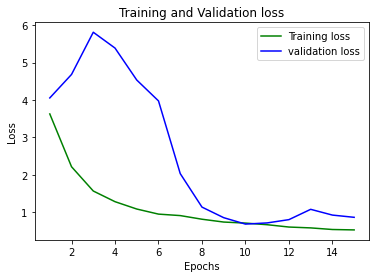

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,16)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

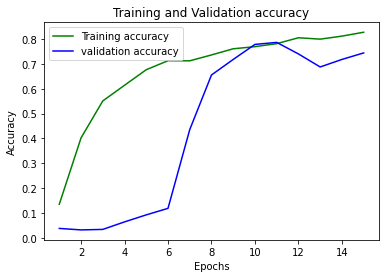

In [ ]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,16)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## How to test the Model ?
<ul>
  <li> Preprocess the images according to the <i>UploadTheImageArrays(), <b>the function takes in a list of image paths.</b> </b>
  </i> </li>
  <li>Then pass it to the model . 